<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0718/02_1_(practice)Custom_Dataset_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom Dataset preparation

## 데이터셋 Annotation



### 방법1. local tool 활용
https://github.com/heartexlabs/labelImg/releases

### 방법 2. roboflow annotation tool 활용

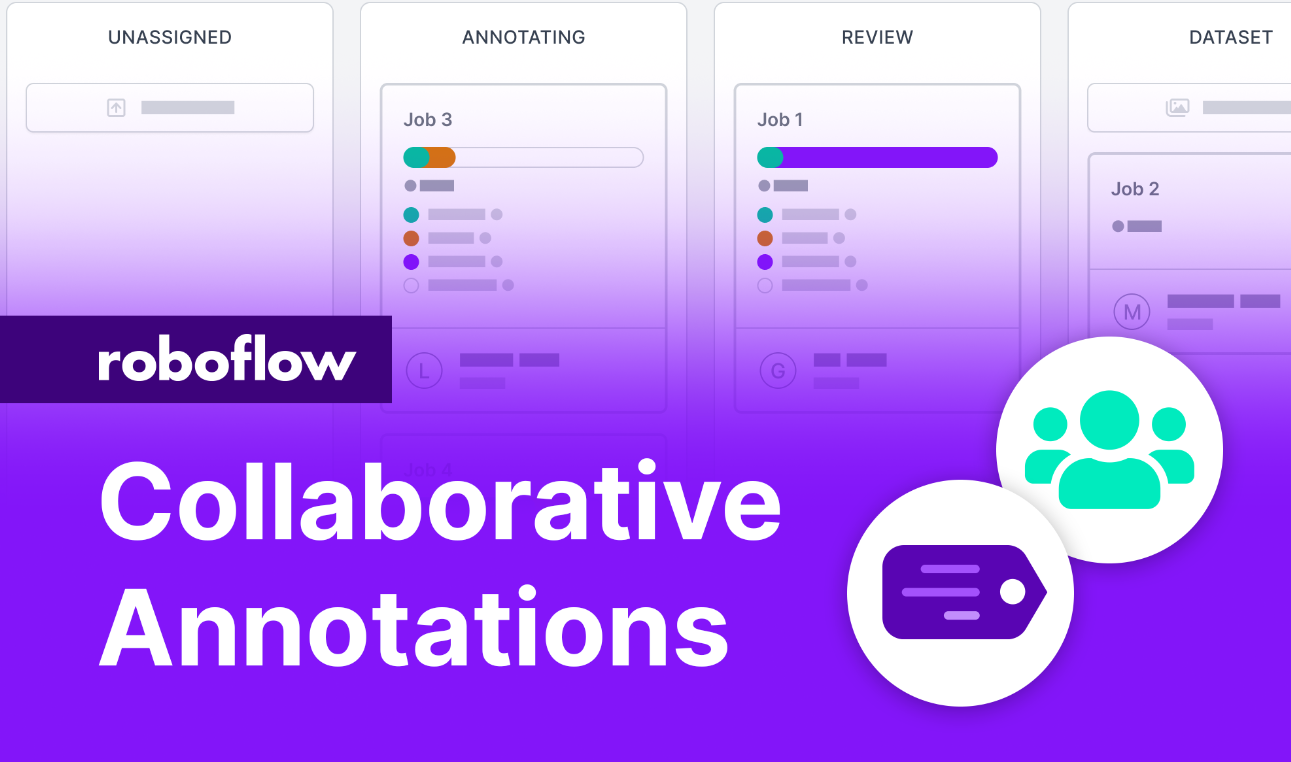

### XML 정보 TXT 파일로 생성하기
XML은 계층적인 형식의 데이터이며, 이를 나타내는 가장 자연스러운 방법은 트리를 사용하는 것입니다.  
ET에는 이 목적을 위한 두 가지 클래스가 있습니다.
- ElementTree는 전체 XML 문서를 트리로 나타내고,
- Element는 이 트리에 있는 단일 노드를 나타냅니다.  
출처 : https://docs.python.org/ko/3/library/xml.etree.elementtree.html

In [ ]:
import os
import glob
import pandas as pd

import xml.etree.ElementTree as ET

In [ ]:
!gdown 1243y4NFGU9rZkiD_VGivE2HInP-u5dUc

Downloading...
From: https://drive.google.com/uc?id=1243y4NFGU9rZkiD_VGivE2HInP-u5dUc
To: /content/mask_xml.zip
100% 997/997 [00:00<00:00, 1.40MB/s]


In [ ]:
!unzip mask_xml.zip

Archive:  mask_xml.zip
  inflating: mask_01.xml             
  inflating: mask_02.xml             


In [ ]:
# 파일을 읽어서 이 데이터를 가져오기
tree = ET.parse('mask_01.xml')
root = tree.getroot()

    '''<annotation>
        <folder>windows_v1.8.1</folder>
        <filename>add_01.jpg</filename>
        <path>C:\Users\82103\Downloads\windows_v1.8.1\windows_v1.8.1\add_01.jpg</path>
        <source>
            <database>Unknown</database>
        </source>
        <size>
            <width>849</width>
            <height>566</height>
            <depth>3</depth>
        </size>
     <segmented>0</segmented>
        <object>
            <name>mask</name>
            <pose>Unspecified</pose>
            <truncated>0</truncated>
            <difficult>0</difficult>
            <bndbox>
                <xmin>185</xmin>
                <ymin>123</ymin>
                <xmax>277</xmax>
                <ymax>244</ymax>
            </bndbox>
        </object>
        <object>
            <name>mask</name>
            <pose>Unspecified</pose>
            <truncated>0</truncated>
            <difficult>0</difficult>
            <bndbox>
                <xmin>379</xmin>
                <ymin>160</ymin>
                <xmax>475</xmax>
                <ymax>277</ymax>
            </bndbox>
        </object>
        <object>
            <name>mask</name>
            <pose>Unspecified</pose>
            <truncated>0</truncated>
            <difficult>0</difficult>
            <bndbox>
                <xmin>566</xmin>
                <ymin>137</ymin>
                <xmax>654</xmax>
                <ymax>252</ymax>
            </bndbox>
        </object>
    </annotation>'''

In [ ]:
# 원하는 정보 가져오기
root.findall('object')[0].find('name').text

'mask'

In [ ]:
def xml_to_txt(path):
    xml_list = []

    label2idx = {'mask' : 0, 'no-mask' : 1}

    for xml_file in glob.glob(path + '/*.xml'):
        filename = xml_file.split('/')[-1][:-4] + '.txt'
        # print(filename)
        f = open(filename, 'w')

        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
           ## label and bbox

            info = f'{label_idx} {x} {y} {w} {h}'

            # print(info)
            f.write(info+'\n')

In [ ]:
xml_to_txt('/content')

mask_01.txt
0 0.21790341578327443 0.21731448763250882 0.10836277974087162 0.2137809187279152
0 0.4464075382803298 0.2826855123674912 0.11307420494699646 0.2067137809187279
0 0.6666666666666666 0.2420494699646643 0.10365135453474676 0.20318021201413428
mask_02.txt
0 0.02591283863368669 0.20141342756183744 0.11896348645465253 0.19434628975265017
0 0.2756183745583039 0.1855123674911661 0.07891637220259129 0.14487632508833923
1 0.5017667844522968 0.23851590106007067 0.06949352179034157 0.13780918727915195
0 0.6454652532391049 0.27208480565371024 0.06595995288574794 0.10777385159010601
0 0.4911660777385159 0.4840989399293286 0.05653710247349823 0.13250883392226148
0 0.17432273262661954 0.4734982332155477 0.10129564193168433 0.19257950530035337
0 0.02944640753828033 0.676678445229682 0.15665488810365136 0.2826855123674912
0 0.6949352179034158 0.5 0.0706713780918728 0.1519434628975265
0 0.9069493521790342 0.41519434628975266 0.04240282685512368 0.08303886925795052
0 0.9517078916372202 0.40106